In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Bio
!pip install pymed
!pip install transformers
!pip install -U spacy
!pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl
!pip install metapub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 273 kB 5.3 MB/s 
     |████████████████████████████████| 2.7 MB 63.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.7 MB/s 
     |████████████████████████████████| 182 kB 41.9 MB/s 
     |████████████████████████████████| 7.6 MB 35.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 607.4 MB 23 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 7.1 MB/s 
   

In [ ]:
from Bio import Entrez, Medline
import pandas as pd
import argparse
import time
import datetime
import pytz
from typing import List, Union
import os
import sys

In [ ]:
import torch
import transformers
import pandas as pd
from sklearn import preprocessing # For Label encoding
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import re
import itertools
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# Setting up GPU for Bert
if torch.cuda.is_available():      
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Dec  9 15:55:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |      3MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import glob
import os
import fileinput
import sys
import pandas as pd
from pymed import PubMed

In [ ]:
pubmed_results=pd.read_csv('Alzheimer.csv')

In [ ]:
pubmed_results.head()

,Unnamed: 0,pubmed_id,title,abstract,doi,publication_date,authors
0,0,36375694,Characterisation of C101248: A novel selective...,"Neuroinflammation, specifically the NLRP3 infl...",10.1016/j.neuropharm.2022.109330,2022-11-15,"[{'lastname': 'Ossola', 'firstname': 'Bernardi..."
1,1,36375591,Risk of subsequent dementia or Alzheimer's dis...,"Alzheimer's disease (AD), a common form of dem...",10.1016/j.ajo.2022.11.005,2022-11-15,"[{'lastname': 'Tsai', 'firstname': 'Hou-Ren', ..."
2,2,36374494,Brain Aging Among Racially and Ethnically Dive...,Neuroimaging studies have documented racial an...,10.1001/jamaneurol.2022.3919,2022-11-15,"[{'lastname': 'Turney', 'firstname': 'Indira C..."
3,3,36374001,Revisiting the involvement of tau in complex n...,Tau ablation has a protective effect in epilep...,10.1088/1741-2552/aca261,2022-11-15,"[{'lastname': 'Bouillet', 'firstname': 'Thomas..."
4,4,36373976,Role of Calcium Dysregulation in Alzheimer's D...,The increasing incidence of Alzheimer's Diseas...,10.1111/cbdd.14175,2022-11-15,"[{'lastname': 'Joshi', 'firstname': 'Maithili'..."


In [ ]:
pubmed_results['year_published'] = pubmed_results['publication_date'].str[:4]            
pubmed_results['year_published'] = pubmed_results['year_published'].astype(int)

In [ ]:
pubmed_results.shape

(19000, 8)

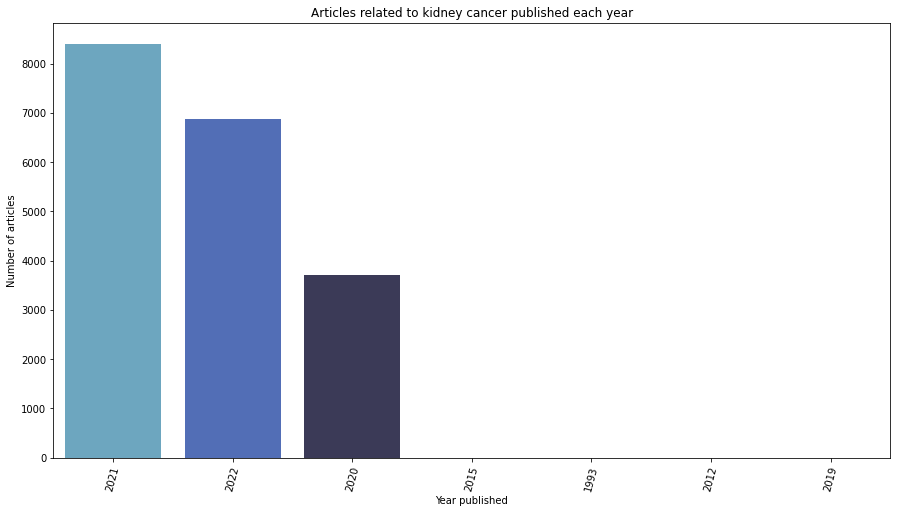

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
import random
fig, ax = plt.subplots(figsize =(15,8))
a = sns.countplot(data=pubmed_results, x='year_published', palette='icefire',order = pubmed_results['year_published'].value_counts().index)
plt.xticks(rotation=75)
a.set(xlabel='Year published', ylabel='Number of articles', title='Articles related to kidney cancer published each year');

In [ ]:
pubmed_results['Title_abstract'] =pubmed_results['title'] + pubmed_results['abstract']

In [ ]:
pubmed_results=pubmed_results.dropna(subset=['Title_abstract'])

In [ ]:
pubmed_results['RCT'] = pd.np.where(pubmed_results.Title_abstract.str.contains("randomized control"), "yes", "no")

<ipython-input-15-50e6ede80043>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pubmed_results['RCT'] = pd.np.where(pubmed_results.Title_abstract.str.contains("randomized control"), "yes", "no")


In [ ]:
pubmed_results["RCT"][pubmed_results['Title_abstract'].str.contains("trial")] = "yes"
pubmed_results['RCT'].value_counts()

<ipython-input-16-cf539caf5d15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubmed_results["RCT"][pubmed_results['Title_abstract'].str.contains("trial")] = "yes"


no     15959
yes     1652
Name: RCT, dtype: int64

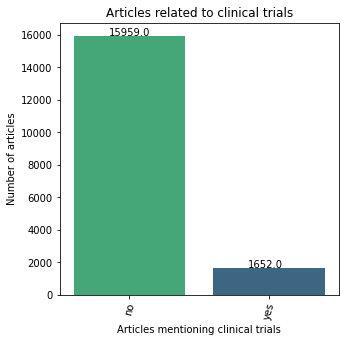

In [ ]:
fig, ax = plt.subplots(figsize =(5,5))
a = sns.countplot(data=pubmed_results, x='RCT', palette='viridis_r')
plt.xticks(rotation=75)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

a.set(xlabel='Articles mentioning clinical trials', ylabel='Number of articles', title='Articles related to clinical trials');
plt.show()

## We have 1652 articles with Clinical trials and 15959 otherwise. We will use balances dataset to train and test the BERT model (7:3 ratio)

In [ ]:
rct=pubmed_results[pubmed_results['RCT']=='yes']
nonrct=pubmed_results[pubmed_results['RCT']=='no']
non_rct=nonrct.sample(n=rct.shape[0])
All_data=pd.concat([rct,non_rct])
All_data['RCT'].value_counts()

yes    1652
no     1652
Name: RCT, dtype: int64

In [ ]:
All_data= All_data.drop_duplicates(subset=["pubmed_id"], keep='first')
All_data['RCT'].value_counts()

yes    1652
no     1652
Name: RCT, dtype: int64

In [ ]:
All_data.head()

,Unnamed: 0,pubmed_id,title,abstract,doi,publication_date,authors,year_published,Title_abstract,RCT
6,6,36373344,A public resource of baseline data from the Al...,The Alzheimer's Prevention Initiative Autosoma...,10.1002/alz.12843,2022-11-15,"[{'lastname': 'Reiman', 'firstname': 'Eric M',...",2022,A public resource of baseline data from the Al...,yes
19,19,36370583,Multimodal ensemble model for Alzheimer's dise...,Alzheimer's Disease (AD) is the most common ty...,10.1016/j.compbiomed.2022.106201,2022-11-13,"[{'lastname': 'Velazquez', 'firstname': 'Matth...",2022,Multimodal ensemble model for Alzheimer's dise...,yes
27,27,36368169,Effectiveness of motor-cognitive dual-task exe...,It is important to investigate the effectivene...,10.1016/j.clineuro.2022.107501,2022-11-12,"[{'lastname': 'Menengi Ç', 'firstname': 'Kübra...",2022,Effectiveness of motor-cognitive dual-task exe...,yes
28,28,36367770,A Psychosocial Intervention for Supporting Inf...,Dementia is a neurodegenerative syndrome chara...,10.2196/37496,2022-11-12,"[{'lastname': 'Pasquini', 'firstname': 'Sara',...",2022,A Psychosocial Intervention for Supporting Inf...,yes
70,70,36359767,"Empagliflozin Induced Ketosis, Upregulated IGF...",Sodium-glucose cotransporter-2 inhibitors (SGL...,10.3390/cells11213372,2022-11-12,"[{'lastname': 'Avgerinos', 'firstname': 'Konst...",2022,"Empagliflozin Induced Ketosis, Upregulated IGF...",yes


## Splitting data for training and testing

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
X = All_data[['title','abstract']]
y = All_data[['RCT']]
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.7, random_state=7)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
     xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
     ytrain, ytest = y.iloc[train_index], y.iloc[test_index]


# Training BERT Model to identify if an article has mentioned random controlled trail or not
### Label Encoding

In [ ]:
Train_df=xtrain.copy()
Train_df['label']=ytrain
Test_df=xtest.copy()
Test_df['label']=ytest
Test_df['label'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
#Label Encoding label column
le = preprocessing.LabelEncoder()
le.fit(Train_df['label'])
Train_df['label']=le.transform(Train_df['label'])
Test_df['label']=le.transform(Test_df['label'])
Train_df.head()

,title,abstract,label
1004,Temporal order of clinical and biomarker chang...,"Unlike familial Alzheimer's disease, we have b...",1
10457,Dengzhan shengmai capsule combined with donepe...,To observe the effects of Dengzhan Shengmai ca...,1
15504,Integrating Biomarker Outcomes into Clinical T...,The NIH-funded Alzheimer's Biomarker Consortiu...,1
7137,Remote activity monitoring for family caregive...,The goal of the present study was to determine...,1
17702,Sedative Load in Community-Dwelling Older Adul...,Older adults are frequently prescribed medicat...,1


# Tokenizing Data

In [ ]:
abstract = Train_df.abstract.values
labels = Train_df.label.values
abstract_test = Test_df.abstract.values
labels_test = Test_df.label.values

In [ ]:
from transformers import BertTokenizer
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# Tokenize all of the abstract and map the tokens to thier word IDs.
input_ids = []

#Encode function will add [CLS] token to the start and [SEP] token at the end 
#The column will be tokenized and maped to their respective IDs (generated unique for each word)
for sent in abstract:
    encoded_sent = tokenizer.encode(sent,add_special_tokens = True,)
    input_ids.append(encoded_sent)
input_ids_test = []

# Repeating the tokenization steps for train data
for sent in abstract_test:
    encoded_sent = tokenizer.encode(sent,add_special_tokens = True,)
    input_ids_test.append(encoded_sent)
print('Abstract before Tokenization \n', abstract[0])
print('Tokens Generated \n', input_ids[0])
print('Maximum length of abstract in Train dataset is', max([len(sen) for sen in input_ids]))
print('Maximum length of abstract in Test dataset is', max([len(sen) for sen in input_ids_test]))

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (723 > 512). Running this sequence through the model will result in indexing errors


Abstract before Tokenization 
 Unlike familial Alzheimer's disease, we have been unable to accurately predict symptom onset in presymptomatic familial frontotemporal dementia (f-FTD) mutation carriers, which is a major hurdle to designing disease prevention trials. We developed multimodal models for f-FTD disease progression and estimated clinical trial sample sizes in C9orf72, GRN and MAPT mutation carriers. Models included longitudinal clinical and neuropsychological scores, regional brain volumes and plasma neurofilament light chain (NfL) in 796 carriers and 412 noncarrier controls. We found that the temporal ordering of clinical and biomarker progression differed by genotype. In prevention-trial simulations using model-based patient selection, atrophy and NfL were the best endpoints, whereas clinical measures were potential endpoints in early symptomatic trials. f-FTD prevention trials are feasible but will likely require global recruitment efforts. These disease progression models

In [ ]:
!pip install keras.preprocessing.sequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.sequence (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.sequence


In [ ]:
#Padding the tokens generated from abstract column to make them of equal length to feed the bert model
# Using pad_sequences

MAX_LEN = 512

#We are adding tokens of value =0 for padding  and removing columns with token no. greater than MAX_LEN
print('Padding Training data tokens')
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
print('Padding Testing data tokens')
input_ids_test = pad_sequences(input_ids_test, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")


Padding Training data tokens
Padding Testing data tokens


## Attention Masking
#### The attention mask simply distinguishes between tokens that are actual words and those that are filler. The ID 0 is not used in the BERT vocabulary, therefore if a token's ID is 0, it's padding; otherwise, it's a true token.

In [ ]:
# Create attention masks
attention_masks = []
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)
attention_masks_test = []

for sent in input_ids_test:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks_test.append(att_mask)    

In [ ]:
train_inputs, test_input, train_labels, test_labels = train_test_split(input_ids, labels, random_state=9, test_size=0.1)
train_masks, test_masks, _, _ = train_test_split(attention_masks, labels,random_state=9, test_size=0.1)

# Converting Data into torch tensors to be compatable with BERT

In [ ]:
train_inputs = torch.tensor(train_inputs)
test_input = torch.tensor(test_input)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)
train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

In [ ]:
# The DataLoader need batch size for training
# For fine-tuning BERT on a specific task, the recommended batch size is 16 or 32 hence we are using 32
batch_size = 10

# creating DataLoader for training data
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# creating DataLoader for testing data
validation_data = TensorDataset(test_input, test_masks, test_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# Loading BertForSequenceClassification BERT model containing a single linear classification layer on top. 



*   We are using 12 layer BERT model with uncased input



In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 2,output_attentions = True, output_hidden_states = True,)
model.cuda()

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Model Parameters 

In [ ]:
params = list(model.named_parameters())
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (768,)
bert.encoder.layer.0.attention.output.LayerNor

In [ ]:
# AdamW is a class from the huggingface library  
optimizer = AdamW(model.parameters(), lr = 5e-5, eps = 1e-8)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps = 0,num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def acc_fun(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    time = int(round((elapsed)))
    return str(datetime.timedelta(seconds=time))

In [ ]:

seed_val = 7
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

    print("Epoch",epoch_i)
    t0 = time.time()
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Time for each epoch
            elapsed = format_time(time.time() - t0)
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        #clearing previous gradients before performing backward pass
        model.zero_grad()        

        # Perform a forward pass 
        outputs = model(b_input_ids,token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()

        # Performing backward pass to calculate the gradients
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update the learning rate
        scheduler.step()
    # Calculate the average loss over the training data
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("  Training loss = {0:.2f}".format(avg_train_loss))
    print("  Time Taken {:}".format(format_time(time.time() - t0)))
    #Test data
    t0 = time.time()
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():        
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = acc_fun(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    # Accuracy of Test data
    print("  Accuracy  =  {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Time Taken for Test data is {:}".format(format_time(time.time() - t0)))


Epoch 0
  Training loss = 0.51
  Time Taken 0:01:30
  Accuracy  =  0.93
  Time Taken for Test data is 0:00:03
Epoch 1
  Training loss = 0.18
  Time Taken 0:01:28
  Accuracy  =  0.93
  Time Taken for Test data is 0:00:03
Epoch 2
  Training loss = 0.14
  Time Taken 0:01:28
  Accuracy  =  0.93
  Time Taken for Test data is 0:00:03
Epoch 3
  Training loss = 0.13
  Time Taken 0:01:28
  Accuracy  =  0.95
  Time Taken for Test data is 0:00:03


#### Testing on Test Data

In [ ]:
prediction_inputs = torch.tensor(input_ids_test)
prediction_masks = torch.tensor(attention_masks_test)
prediction_labels = torch.tensor(labels_test)  
batch_size = 10
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits)
  true_labels.append(label_ids)

Predicting labels for 2,313 test sentences...


In [ ]:
from sklearn.metrics import classification_report
True_Label_Test=np.concatenate(true_labels)
predictions_Test=np.concatenate(predictions)
predictions_Test=np.argmax(predictions_Test,axis=1).flatten()

In [ ]:
print(classification_report(True_Label_Test, predictions_Test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1157
           1       0.97      0.95      0.96      1156

    accuracy                           0.96      2313
   macro avg       0.96      0.96      0.96      2313
weighted avg       0.96      0.96      0.96      2313



# Predicting if clinical trial is being discussed in the article for all articles

In [ ]:
All=pubmed_results.copy()
All['label']=le.transform(All['RCT'])
abstract_all = All.abstract.values
labels_all = All.label.values
input_ids_all = []

for sent in abstract_all:
    encoded_sent = tokenizer.encode(sent,add_special_tokens = True,)
    input_ids_all.append(encoded_sent)    

In [ ]:
input_ids_all = pad_sequences(input_ids_all, maxlen=512, dtype="long", value=0, truncating="post", padding="post")
#Attention masking
attention_masks_all = []

for sent in input_ids_all:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks_all.append(att_mask) 

In [ ]:
prediction_inputs = torch.tensor(input_ids_all)
prediction_masks = torch.tensor(attention_masks_all)
prediction_labels = torch.tensor(labels_all)  
batch_size = 10  
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits)
  true_labels.append(label_ids)

Predicting labels for 17,611 test sentences...


In [ ]:
from sklearn.metrics import classification_report
True_Label_Test=np.concatenate(true_labels)
predictions_Test=np.concatenate(predictions)
predictions_Test=np.argmax(predictions_Test,axis=1).flatten()

In [ ]:
print("Accuracy score is ",np.round(accuracy_score(True_Label_Test, predictions_Test),2))
print("F1 score is ",np.round(f1_score(True_Label_Test, predictions_Test, average='macro'),2))
print("Precision score is ",np.round(precision_score(True_Label_Test, predictions_Test, average='macro'),2))
print("Recall score is ",np.round(recall_score(True_Label_Test, predictions_Test, average='macro'),2))

Accuracy score is  0.97
F1 score is  0.92
Precision score is  0.88
Recall score is  0.96


In [ ]:
True_Label_Test.shape

(17611,)

In [ ]:
All['prediction']=predictions_Test
All['true_label']=True_Label_Test

In [ ]:
All.to_csv("/content/drive/MyDrive/Drug_recommendation_Alzimer/Rct_prediction.xlsx")

## Scispacy NER model 
### Example

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125.1 MB 40 kB/s 
     |████████████████████████████████| 6.0 MB 8.3 MB/s 
     |████████████████████████████████| 13.7 MB 63.4 MB/s 
     |████████████████████████████████| 671 kB 76.2 MB/s 
  Created wheel for en-ner-bc5cdr-md: filename=en_ner_bc5cdr_md-0.4.0-py3-none-any.whl size=125666882 sha256=307ab83fa5fbaf1f7c4bc98c3fd798a6be9dae76128a084f907eef05b165dea7
  Stored in directory: /root/.cache/pip/wheels/5e/d7/4a/3687ca1af324854b7edb76321c472a2743d778c28094ab2979
Successfully built en-ner-bc5cdr-md
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: thinc
    Found e

In [ ]:
#import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")
doc = nlp(pubmed_results['abstract'][0])
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
Neuroinflammation 0 17 DISEASE
neurodegenerative diseases 116 142 DISEASE
K 218 219 CHEMICAL


In [ ]:
t=pubmed_results['abstract'][0]
doc = nlp(t)
col_dict = {}
seven_colours = ['#8365B1', '#FF7582', '#DE3163', '#ffd8b1', '#FEDC26', '#f032e6', '#42B8E6']
for label, colour in zip(nlp.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': nlp.pipe_labels['ner'], 'colors':col_dict}

spacy.displacy.render(doc, style='ent', jupyter=True, options=options)
[(ent.text, ent.label_) for ent in doc.ents]

[('Neuroinflammation', 'DISEASE'),
 ('neurodegenerative diseases', 'DISEASE'),
 ('K', 'CHEMICAL')]

#### Punctuation marks are usually removed in NLP preprocessing steps, but we can’t remove all of them here, otherwise, we may miss chemical names and would mess up quantities like drug dosage. However, we can solve this problem by removing the “.,” marks that appear to separate some sections of the transcription. It is important to know your data and your data’s domain to have a better comprehension of your results.

In [ ]:
import re

All['abstract'] = All['abstract'].apply(lambda x: re.sub('(\.,)', ". ", str(x)))

In [ ]:
from spacy.matcher import Matcher

pattern = [{'ENT_TYPE':'CHEMICAL'}]
matcher = Matcher(nlp.vocab)
matcher.add("DRUG_NAME", [pattern])

In [ ]:
chemical_entities=[]
for transcription in All['abstract']:
    drug_found=[]
    doc = nlp(transcription)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]
        span = doc[start:end] 
        #print(string_id,span.text)
        drug_found.append(span.text)  
    chemical_entities.append(drug_found)    
All['scispacy_drugs']=chemical_entities       

In [ ]:
All.head()

,Unnamed: 0,pubmed_id,title,abstract,doi,publication_date,authors,year_published,Title_abstract,RCT,label,prediction,true_label,scispacy_drugs
0,0,36375694,Characterisation of C101248: A novel selective...,"Neuroinflammation, specifically the NLRP3 infl...",10.1016/j.neuropharm.2022.109330,2022-11-15,"[{'lastname': 'Ossola', 'firstname': 'Bernardi...",2022,Characterisation of C101248: A novel selective...,no,0,0,0,[K]
1,1,36375591,Risk of subsequent dementia or Alzheimer's dis...,"Alzheimer's disease (AD), a common form of dem...",10.1016/j.ajo.2022.11.005,2022-11-15,"[{'lastname': 'Tsai', 'firstname': 'Hou-Ren', ...",2022,Risk of subsequent dementia or Alzheimer's dis...,no,0,0,0,[]
2,2,36374494,Brain Aging Among Racially and Ethnically Dive...,Neuroimaging studies have documented racial an...,10.1001/jamaneurol.2022.3919,2022-11-15,"[{'lastname': 'Turney', 'firstname': 'Indira C...",2022,Brain Aging Among Racially and Ethnically Dive...,no,0,0,0,[]
3,3,36374001,Revisiting the involvement of tau in complex n...,Tau ablation has a protective effect in epilep...,10.1088/1741-2552/aca261,2022-11-15,"[{'lastname': 'Bouillet', 'firstname': 'Thomas...",2022,Revisiting the involvement of tau in complex n...,no,0,0,0,[Tau]
4,4,36373976,Role of Calcium Dysregulation in Alzheimer's D...,The increasing incidence of Alzheimer's Diseas...,10.1111/cbdd.14175,2022-11-15,"[{'lastname': 'Joshi', 'firstname': 'Maithili'...",2022,Role of Calcium Dysregulation in Alzheimer's D...,no,0,0,0,"[Calcium, Ca]"


In [ ]:
from spacy.matcher import Matcher

pattern_disease = [{'ENT_TYPE':'DISEASE'}]
matcher_disease = Matcher(nlp.vocab)
matcher_disease.add("DISEASE", [pattern_disease])
disease_entities=[]
for transcription in All['abstract']:
    disease_found=[]
    doc = nlp(transcription)
    matches_disease = matcher_disease(doc)
    for match_id, start, end in matches_disease:
        string_id = nlp.vocab.strings[match_id]
        span = doc[start:end] 
        #print(string_id,span.text)
        disease_found.append(span.text)  
    disease_entities.append(disease_found)    
All['scispacy_disease']=disease_entities       

In [ ]:
All.to_csv("/content/drive/MyDrive/Drug_recommendation_Alzimer/articles_scispacy.csv")

### We are assuming that if an article is primarily talking about kidney cancer, trial and primary drugname associated with it, then we consider the article as an evidence with respect to drug being used for the treatment of kidney cancer